
<html>
   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">
 
</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: AI </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Project2: RL </h1>

</div>

   <div>    
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou- sid:810100084 </h1>

</div>
   

</html>

# Artificial Intelligence Course - Fall 1402
## Computer Assignment #2 - Reinforcement Learning

### The purpose of the project:
In this project, we intend to solve similar problems in the real world by using some powerful learning algorithms.
Let's train the algorithm in the conditions of Q-Learning, Policy Iteration, and Value Iteration in three algorithms. In A
Memorize and analyze


### General description of the project and definition of the problem
In this project, we will solve some problems created for RL practice and available in gym library with the help of RL algorithms. The two problems we are trying to solve, one is the taxi problem and the other is the Frozen Lake problem, which have been solved by different methods and these methods will be compared.



# Table of Contents

- [Part 1: Value Iteration & Policy Iteration Algorithms](#1)
    - [َQuestion 1:](#1-0)
    - [َQuestion 2:](#1-1)
    - [َQuestion 3:](#1-12)
    - [َQuestion 4:](#1-2)
    - [َQuestion 5:](#1-3)
        - [Value Iteration](#1-3-1)
        - [Policy Iteration](#1-3-2)
    - [َQuestion 6:](#1-4)
        - [Value Iteration](#1-4-1)
        - [Policy Iteration](#1-4-2)
- [Part 2: Q-Learning Algorithm](#2)
    - [َQuestion 7:](#2-1)
    - [َQuestion 8:](#2-2)
    - [َQuestion 9:](#2-3)
    - [َQuestion 10:](#2-4)

In [34]:
# import
import numpy as np
import gym
import matplotlib.pyplot as plt
from tabulate import tabulate
import time

<a name='1'></a>
## Part 1: Value Iteration & Policy Iteration Algorithms

In [35]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False , render_mode = "human" )

In [36]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
env.reset()
env.render()

you can see the environment in each step by render command :


In [37]:
# Total no. of states
env.observation_space.n

16

In [38]:
# Total no. of actions
env.action_space.n

4

<a name='1-0'></a>
### Question 1:

Value Iteration is a Markov Decision Process (MDP). It iteratively computes the optimal value function and we can derive the optimal policy from it.

it uses Bellman equation:
$$[ V(s) = \max_a \sum_{s'} T(s, a, s')[R(s, a, s') + \gamma V(s')] ]$$

so:
First we initialize the value function V(s) for all states s to 0

Then For each state s, update the value function using the Bellman Optimality Equation

Repeat until the change in the value function between iterations falls below a predetermined threshold.


And finally For each state s, select the action with the highest expected value based on the updated value function(policy Extraction): 

$$[ \pi^*(s) = \arg\max_a \sum_{s'} T(s, a, s') \left[ R(s, a, s') + \gamma V^(s') \right] ]$$

The value iteration algorithm guarantees convergence to the optimal value function and policy for finite MDPs. It efficiently computes the optimal policy by leveraging the recursive relationship between states and their expected future rewards.


<a name='1-1'></a>
### Question 2:

In [39]:
class ValueIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.step = 0
    def value_estimation(self):
        self.delta = np.inf

        while(self.delta > self.theta):

            self.delta = 0
            self.step += 1
            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                for action in range(self.env.action_space.n):
                    action_value = 0
                    for probability, next_state, reward, done in self.env.P[state][action]:
                        ### START CODE HERE ###
                         action_value += probability * (reward + self.discount_factor * self.state_values[next_state])
                        ### END CODE HERE ###
                    self.q_values[state, action] = action_value

                self.state_values[state] = np.max(self.q_values[state,:])

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

#                 if (self.delta < self.theta):
#                     break

    def take_action(self, action):
        next_state, reward, done, y = self.env.step(action)
        return (next_state, reward, done)

    def get_optimal_policy(self, state):
        return np.argmax(self.q_values[state,:])

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state
    def get_step(self):
        return self.step

<a name='1-12'></a>
### Question 3:

The goal is to determine the best actions to take at each state to maximize the expected cumulative reward over time.


Start with an initial policy, which maps each state to a corresponding action.

1.Policy Evaluation: Evaluate the value function, which represents the expected cumulative reward starting from each state, under the current policy. This involves iteratively updating the value function until it converges.
$$[ V(s) = \sum_{a} \pi(s, a) \sum_{s'} T(s, a, s') \left[ R(s, a, s') + \gamma V(s') \right] ]$$

2.Policy Improvement: Based on the current value function, update the policy by selecting the action with the highest expected value at each state:

$$[ \pi'(s) = \arg\max_a \sum_{s'} T(s, a, s') \left[ R(s, a, s') + \gamma V(s') \right] ]$$

This step aims to improve the policy by exploiting the current knowledge of the value function.

Convergence Check: Repeat until the policy no longer changes significantly (convergence).

Policy Iteration alternates between evaluating the current policy and improving it iteratively until an optimal policy is found. The algorithm guarantees convergence and optimality, as long as all state-action pairs are visited infinitely often, ensuring exploration of the entire MDP.


<a name='1-2'></a>
### Question 4:

In [40]:
class PolicyIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.policy = np.random.randint(self.env.action_space.n, size=self.env.observation_space.n) # initial policy
        self.policy_stable = False
        self.step = 0 ;
    def policy_evaluation(self):
        self.delta = np.inf

        while(self.delta >= self.theta):

            self.delta = 0
            self.step += 1
            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                new_state_value = 0
                for probability, next_state, reward, done in self.env.P[state][self.policy[state]]:
                    ### START CODE HERE ###
                    new_state_value += probability * (reward + self.discount_factor *self.state_values[next_state] )
                    ### END CODE HERE ###
                self.state_values[state] = new_state_value

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

    def policy_improvement(self):
        self.policy_stable = True

        for state in range(self.env.observation_space.n):
            old_policy = self.policy[state]

            for action in range(self.env.action_space.n):

                action_value = 0
                for probability, next_state, reward, done in self.env.P[state][action]:
                    ### START CODE HERE ###
                    action_value += probability * (reward + self.discount_factor *self.state_values[next_state] )
                    ### END CODE HERE ###
                self.q_values[state, action] = action_value

            self.policy[state] = np.argmax(self.q_values[state,:])

            if old_policy != self.policy[state]:
                self.policy_stable = False

    def policy_estimation(self):
        self.policy_stable = False

        while not self.policy_stable:
            self.policy_evaluation()
            self.policy_improvement()

    def take_action(self, action):
        next_state, reward, done, y  , x = self.env.step(action)
        return (next_state, reward, done)

    def get_optimal_policy(self, state):
        return self.policy[state]

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state= self.env.reset()
        return initial_state
    def get_step(self):
        return self.step

<a name='1-3'></a>
### Question 5:

<a name='1-3-1'></a>
#### Value Iteration:

In [41]:
import matplotlib.pyplot as plt
from tabulate import tabulate
# Value Iteration
NUM_REPEAT = 5
step_to_converge_vi=np.zeros(NUM_REPEAT)
time_to_converge_vi=np.zeros(NUM_REPEAT)
for i in range(NUM_REPEAT):
    value_iteration = ValueIteration(env, discount_factor=0.9)
    start=time.time()
    value_iteration.value_estimation()
    end=time.time()
    time_to_converge_vi[i]=round(end-start,4)
    step_to_converge_vi[i]=value_iteration.get_step()



print("Optimal Policy (Value Iteration):")
optimal_policy_vi = np.array([value_iteration.get_optimal_policy(state) for state in range(env.observation_space.n)])
arrow_symbols = {0: '←', 1: '↓', 2: '→'}
arrow_array = np.vectorize(arrow_symbols.get)(optimal_policy_vi.reshape(4,4))
table = tabulate(arrow_array, tablefmt='fancy_grid', showindex=False, numalign='center')
print(table)

print("State value:")
state_values = value_iteration.get_state_values()
state_values = np.around(state_values, 4)
state_values_table = state_values.reshape(4,4).tolist()
value_table = tabulate(state_values_table, tablefmt='fancy_grid', showindex=False, numalign='center')
print(value_table)

print("Q values:")
Q_values = value_iteration.get_q_values()
Q_values = np.around(Q_values, 4)
reshaped_values = np.reshape(Q_values, (4, 4, 4))
reshaped_values = np.char.mod('%0.4f', reshaped_values).tolist()
# Generate the table with the first value on the left, second at the bottom, third on the right, and fourth on the top
table = []
for row in reshaped_values:
    temp_row = []
    for cell in row:
        top_value = cell[3]
        bottom_value = cell[2]
        left_value = cell[0]
        right_value = cell[1]
        formatted_cell = f'.   {top_value:^7}\n{left_value:<5}  {bottom_value:>5}\n    {right_value:^7}'
        temp_row.append(formatted_cell)
    table.append(temp_row)
table_str = tabulate(table, tablefmt='fancy_grid')
print(table_str)

env.reset()

# Simulate the agent following the optimal policy
print("\nSimulating the agent following the optimal policy...")
done = False
state = env.s
while not done:
    action = optimal_policy_vi[state]
    state, reward, done, info = env.step(action)
    env.render()

env.reset()
env.close()


Optimal Policy (Value Iteration):
╒═══╤═══╤═══╤═══╕
│ ↓ │ → │ ↓ │ ← │
├───┼───┼───┼───┤
│ ↓ │ ← │ ↓ │ ← │
├───┼───┼───┼───┤
│ → │ ↓ │ ↓ │ ← │
├───┼───┼───┼───┤
│ ← │ → │ → │ ← │
╘═══╧═══╧═══╧═══╛
State value:
╒════════╤════════╤═══════╤════════╕
│ 0.5905 │ 0.6561 │ 0.729 │ 0.6561 │
├────────┼────────┼───────┼────────┤
│ 0.6561 │   0    │ 0.81  │   0    │
├────────┼────────┼───────┼────────┤
│ 0.729  │  0.81  │  0.9  │   0    │
├────────┼────────┼───────┼────────┤
│   0    │  0.9   │   1   │   0    │
╘════════╧════════╧═══════╧════════╛
Q values:
╒════════════════╤════════════════╤════════════════╤════════════════╕
│ .   0.5314     │ .   0.5905     │ .   0.6561     │ .   0.5905     │
│ 0.5314  0.5905 │ 0.5314  0.6561 │ 0.5905  0.5905 │ 0.6561  0.5905 │
│     0.5905     │     0.0000     │     0.7290     │     0.0000     │
├────────────────┼────────────────┼────────────────┼────────────────┤
│ .   0.5314     │ .   0.0000     │ .   0.6561     │ .   0.0000     │
│ 0.5905  0.0000 │ 0.0000  0

<a name='1-3-2'></a>
#### Policy Iteration:

In [42]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False , render_mode = "human" )
env.reset()
env.render()
NUM_REPEAT = 5
step_to_converge_pi=np.zeros(NUM_REPEAT)
time_to_converge_pi=np.zeros(NUM_REPEAT)
for i in range(NUM_REPEAT):
    policy_iteration = PolicyIteration(env, discount_factor=0.9)
    start=time.time()
    policy_iteration.policy_estimation()
    end=time.time()
    time_to_converge_pi[i]=round(end-start,4)
    step_to_converge_pi[i]=policy_iteration.get_step()



print("Optimal Policy (Policy Iteration):")
optimal_policy_pi = np.array([policy_iteration.get_optimal_policy(state) for state in range(env.observation_space.n)])
arrow_symbols = {0: '←', 1: '↓', 2: '→'}
arrow_array_pi = np.vectorize(arrow_symbols.get)(optimal_policy_pi.reshape(4,4))
table = tabulate(arrow_array_pi, tablefmt='fancy_grid', showindex=False, numalign='center')
print(table)

print("State value:")
state_values = policy_iteration.get_state_values()
state_values = np.around(state_values, 4)
state_values_table = state_values.reshape(4,4).tolist()
value_table = tabulate(state_values_table, tablefmt='fancy_grid', showindex=False, numalign='center')
print(value_table)

print("Q values:")
Q_values = policy_iteration.get_q_values()
Q_values = np.around(Q_values, 4)
reshaped_values = np.reshape(Q_values, (4, 4, 4))
reshaped_values = np.char.mod('%0.4f', reshaped_values).tolist()
# Generate the table with the first value on the left, second at the bottom, third on the right, and fourth on the top
table = []
for row in reshaped_values:
    temp_row = []
    for cell in row:
        top_value = cell[3]
        bottom_value = cell[2]
        left_value = cell[0]
        right_value = cell[1]
        formatted_cell = f'.   {top_value:^7}\n{left_value:<5}  {bottom_value:>5}\n    {right_value:^7}'
        temp_row.append(formatted_cell)
    table.append(temp_row)
table_str = tabulate(table, tablefmt='fancy_grid')
print(table_str)

env.reset()

# Simulate the agent following the optimal policy
print("\nSimulating the agent following the optimal policy...")
done = False
state = env.s
while not done:
    action = optimal_policy_pi[state]
    state, reward, done, info = env.step(action)
    env.render()

env.reset()
env.close()


Optimal Policy (Policy Iteration):
╒═══╤═══╤═══╤═══╕
│ ↓ │ → │ ↓ │ ← │
├───┼───┼───┼───┤
│ ↓ │ ← │ ↓ │ ← │
├───┼───┼───┼───┤
│ → │ ↓ │ ↓ │ ← │
├───┼───┼───┼───┤
│ ← │ → │ → │ ← │
╘═══╧═══╧═══╧═══╛
State value:
╒════════╤════════╤═══════╤════════╕
│ 0.5905 │ 0.6561 │ 0.729 │ 0.6561 │
├────────┼────────┼───────┼────────┤
│ 0.6561 │   0    │ 0.81  │   0    │
├────────┼────────┼───────┼────────┤
│ 0.729  │  0.81  │  0.9  │   0    │
├────────┼────────┼───────┼────────┤
│   0    │  0.9   │   1   │   0    │
╘════════╧════════╧═══════╧════════╛
Q values:
╒════════════════╤════════════════╤════════════════╤════════════════╕
│ .   0.5314     │ .   0.5905     │ .   0.6561     │ .   0.5905     │
│ 0.5314  0.5905 │ 0.5314  0.6561 │ 0.5905  0.5905 │ 0.6561  0.5905 │
│     0.5905     │     0.0000     │     0.7290     │     0.0000     │
├────────────────┼────────────────┼────────────────┼────────────────┤
│ .   0.5314     │ .   0.0000     │ .   0.6561     │ .   0.0000     │
│ 0.5905  0.0000 │ 0.0000  

<a name='1-4'></a>
### Question 6:

<a name='1-4-1'></a>
#### Value Iteration:

In [43]:
print(f"num episodes = {NUM_REPEAT} \nnum steps = {step_to_converge_vi}")
print(f"time = {time_to_converge_vi}")

num episodes = 5 
num steps = [141. 141. 141. 141. 141.]
time = [0.0788 0.0698 0.0717 0.0727 0.0759]


<a name='1-4-2'></a>
#### Policy Iteration:

In [44]:
print(f"num episodes = {NUM_REPEAT} \nnum steps = {step_to_converge_pi}")
print(f"time = {time_to_converge_pi}")

num episodes = 5 
num steps = [152. 154. 152. 152. 154.]
time = [0.0389 0.0394 0.0449 0.0429 0.0399]


Both the Value Iteration and Policy Iteration algorithms aim to find the optimal policy for a given Markov Decision Process (MDP). The optimal policy determines the best actions to take at each state to maximize the expected cumulative reward over time.

In terms of the resulting state values and optimal policy, both algorithms converge to the same values, indicating that they have reached the optimal policy. Therefore, both algorithms are considered optimal.

The main difference between the two algorithms lies in the time it takes to reach convergence and find the optimal policy. In Value Iteration, each iteration involves updating the state values for all possible state-action pairs, which has a time complexity of O(S^2 * A), where S is the number of states and A is the number of actions. On the other hand, Policy Iteration follows a two-step process. It fixes the policy and calculates the state values only for that policy. This results in a time complexity of O(S^2), as it does not involve iterating over all possible actions.

Due to this difference, Policy Iteration often outperforms Value Iteration in terms of convergence time and finding the optimal policy. In fact, the number of iterations needed in Policy Iteration is approximately 1/A times the number of iterations required in Value Iteration. This advantage becomes more significant in MDPs with a large number of states.

Therefore, although both algorithms eventually lead to the same optimal policy, Policy Iteration tends to be more efficient in terms of reaching convergence and finding the optimal policy.

<a name='2'></a>
## Part 2: Q-Learning Algorithm

In [45]:
# hyperparameters
REPS = 20
EPISODES = 2000
EPSILON = 0.1
LEARNING_RATE = 0.1
DISCOUNT = 0.9
STUDENT_NUM = 84
ENV_NAME = 'Taxi-v3'

In [46]:
# environment
env = gym.make('Taxi-v3')
#env.seed(seed = STUDENT_NUM)
Initial_State = env.reset(seed = STUDENT_NUM)
Initial_State

364

In [47]:
taxi_row, taxi_col, pass_idx, dest_idx = env.decode(Initial_State)
taxi_row, taxi_col, pass_idx, dest_idx

(3, 3, 1, 0)

In [48]:
# Total no. of states
env.observation_space.n

500

In [49]:
# Total no. of actions
env.action_space.n

6

<a name='2-1'></a>
### Question 7:

Q-Learning is a reinforcement learning algorithm that helps us find the optimal action-selection policy for a given finite Markov Decision Process (MDP), even when we don't have complete knowledge of the environment's dynamics (transition probabilities, T, and rewards, R).

In Q-Learning, the agent interacts with the environment, and at each step, it receives a reward for the action taken. The goal is to learn the Q-values, which represent the expected cumulative rewards for choosing a particular action in a specific state.

To update the Q-values and ultimately reach the optimal policy, we utilize the Q-Learning update equation. After each action taken, we update the Q-value for the current state-action pair (s, a) as follows:

$$[ \text{sample} = R(s,a,s') + \gamma \max_{a'} Q(s',a') ]$$

This equation calculates the sample, which is the immediate reward (R) obtained from taking action (a) in state (s) and the estimated maximum future reward $((\gamma \max_{a'} Q(s',a')))$ from the resulting next state (s') onwards.

The Q-value for the state-action pair (s, a) is then updated using the learning rate $((\alpha))$:

$$[ Q(s,a) = (1-\alpha)Q(s,a) + \alpha [\text{sample}] ]$$

This equation employs a weighted average of the current Q-value with the new sample information to update the Q-value. The learning rate $((\alpha))$ determines the extent to which the new sample influences the update. A lower learning rate emphasizes the importance of prior knowledge, while a higher learning rate gives more weight to the new information.

By repeatedly taking actions, receiving rewards, and updating the Q-values using the Q-Learning update equation, the algorithm gradually improves its estimation of the optimal policy and converges towards it over time.

<a name='2-2'></a>
### Question 8:

In [58]:
class QLearningAgent():
    def __init__(self, env, epsilon, learning_rate, discount_factor, seed):
        self.env = env
        self.epsilon = epsilon
        self.olr = learning_rate
        self.discount_factor = discount_factor
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
        self.seed = seed

    def choose_action(self, state):
        # With probability epsilon, choose a random action
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.env.action_space.n)
        # Otherwise, choose the action with the highest Q-value
        else:
            action = np.argmax(self.q_table[state])
        return action

    def update_q_table(self, state, action, nextState, reward):
        # Calculate the new Q-value using the Q-learning formula
        current_q = self.q_table[state][action]
        max_next_q = np.max(self.q_table[nextState])
        new_q = (1 - self.olr) * current_q + self.olr * (reward + self.discount_factor * max_next_q)
        self.q_table[state][action] = new_q

    def decay_epsilon(self, episode):
        # Decrease epsilon over episodes
        #self.epsilon = 1 / (episode + 1)
        self.epsilon = self.epsilon - (self.epsilon / (episode+1))
        ## Decay epsilon over time
#       self.epsilon = self.epsilon - self.epsilon / 100
#       if self.epsilon < 0.01:
#           self.epsilon = 0.01
    def decrease_learning_rate(self, episode):
        # Decrease learning rate over episodes
        #self.olr = self.olr / (1 + self.olr * episode)
        #self.olr = self.olr / (episode + 1)
#         # Decrease the learning rate over time
        self.olr = self.olr - self.olr / 500
        if self.olr < 0.001:
            self.olr = 0.001
    def take_action(self, action):
        next_state, reward, done, _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return np.argmax(self.q_table[state])

    def get_q_values(self):
        return self.q_table

    def reset(self):
        # Reset the environment
        return self.env.reset(seed=self.seed)

<a name='2-2'></a>
### Question 9:

In [59]:
def run_q_learning(env, episodes,epsilon , discount_factor , learning_rate, decay_lr=False):
    agent = QLearningAgent(env, epsilon=epsilon, learning_rate=learning_rate, discount_factor=discount_factor, seed=STUDENT_NUM)
    rewards = []
    steps = []
    for episode in range(episodes):
        initial_state = agent.reset()
        total_reward = 0
        total_step = 0
        for step in range(env.spec.max_episode_steps):
            action = agent.choose_action(initial_state)
            next_state, reward, done = agent.take_action(action)
            agent.update_q_table(initial_state, action, next_state, reward)
            total_reward += reward
            total_step += 1
            if done:
                break

            initial_state = next_state

        rewards.append(total_reward)
        steps.append(total_step)
        agent.decay_epsilon(episode)

        if decay_lr:
            agent.decrease_learning_rate(episode)

    optimal_policy_pi = np.array([agent.get_optimal_policy(state) for state in range(env.observation_space.n)])
    return rewards , steps , optimal_policy_pi





In [60]:
def make_mean_list(data):
    transposed_data = list(map(list, zip(*data)))
    means = [sum(values) / len(values) for values in transposed_data]
    return means

In [61]:
env = gym.make(ENV_NAME )
env.reset(seed=STUDENT_NUM)

rewards_const = []
steps_const = []
for rep in range(REPS):
    rewards_constant_lr , steps_constant_lr , policy_constant_lr = run_q_learning(env, EPISODES, EPSILON , DISCOUNT,  learning_rate = LEARNING_RATE , decay_lr=False)
    rewards_const.append(list(rewards_constant_lr))
    steps_const.append(list(steps_constant_lr))
rewards_const_mean = make_mean_list(rewards_const)
steps_const_mean = make_mean_list(steps_const)
rewards_dec = []
steps_dec = []
env.reset()
for rep in range(REPS):
    rewards_decreasing_lr,steps_decreasing_lr , policy_decreasing_lr = run_q_learning(env, EPISODES, EPSILON , DISCOUNT,  learning_rate= LEARNING_RATE, decay_lr=True)
    rewards_dec.append(list(rewards_decreasing_lr))
    steps_dec.append(list(steps_decreasing_lr))
rewards_dec_mean = make_mean_list(rewards_dec)
steps_dec_mean = make_mean_list(steps_dec)


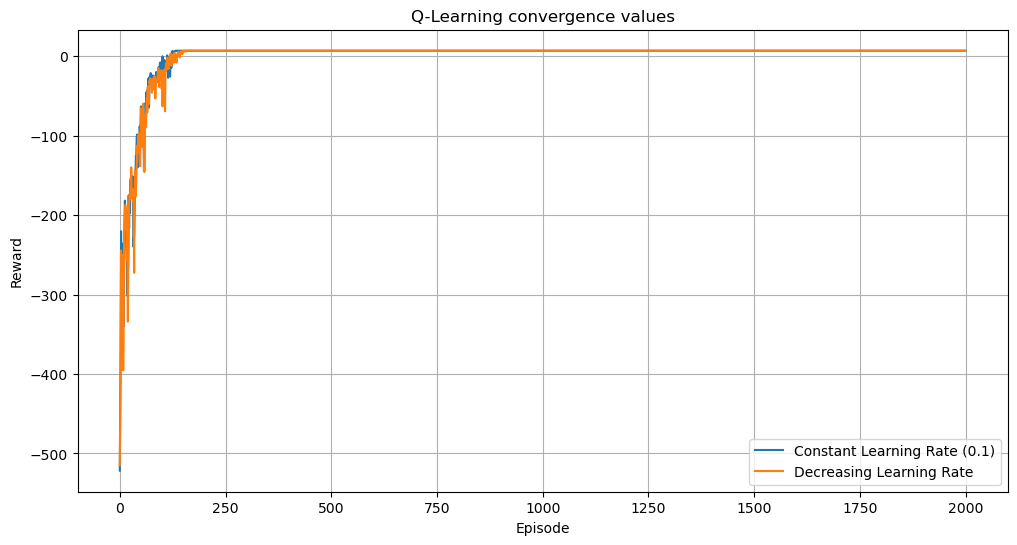

In [62]:
# Plot the convergence graphs
episodes = range(EPISODES)

plt.figure(figsize=(12, 6))
plt.plot(episodes, rewards_const_mean, label='Constant Learning Rate (0.1)')
plt.plot(episodes, rewards_dec_mean, label='Decreasing Learning Rate')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Q-Learning convergence values')
plt.legend()
plt.grid(True)
plt.show()



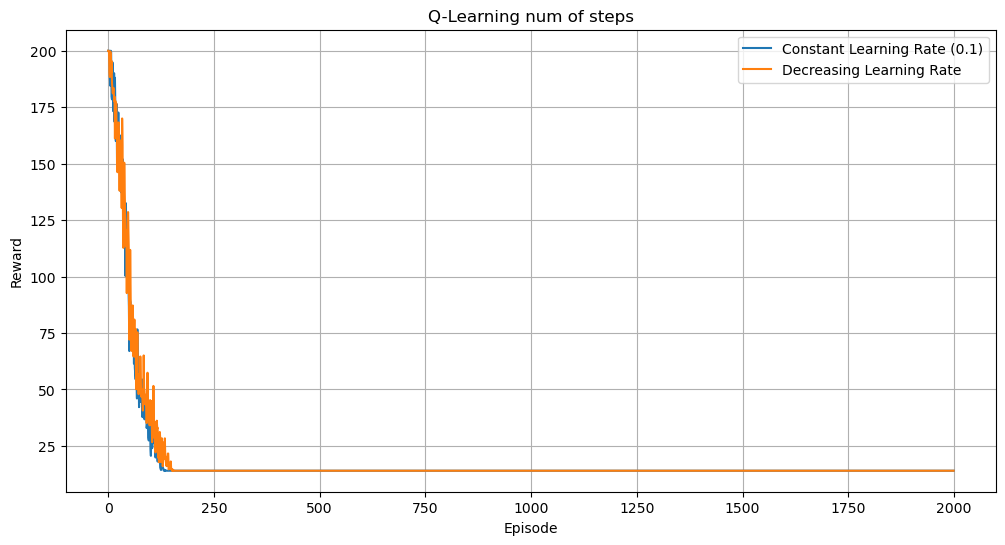

In [63]:
# Plot the convergence graphs
episodes = range(EPISODES)

plt.figure(figsize=(12, 6))
plt.plot(episodes, steps_const_mean, label='Constant Learning Rate (0.1)')
plt.plot(episodes, steps_dec_mean, label='Decreasing Learning Rate')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Q-Learning num of steps')
plt.legend()
plt.grid(True)
plt.show()



The Q-learning algorithm typically converges slower when the learning rate decreases during training. However, decreasing the learning rate can help ensure convergence in some scenarios. In our problem, although we reach convergence regardless of the learning rate, there might not be a significant difference between the two algorithms.

To decrease the epsilon value (exploration rate), we can use some rules for example:

1.$$[ \epsilon = \text{initial }{\epsilon} \times \left(1 - \frac{{\epsilon}}{{\text{{EPISODES}}}}\right) ]$$

2.
$$[ \epsilon = \epsilon - \frac{\epsilon}{100} ]$$

3.
$$[ \epsilon = \frac{1}{{\text{{episode}} + 1}} ]$$

There are similar methods for reducing the learning rate.


After trying different methods, it was determined that the first method is the best among the available modes because
هn this formula, epsilon $((\epsilon))$ ranges from 0.1 to 0. The larger the episode becomes, the smaller the epsilon value becomes, gradually approaching zero. This approach helps our agent, at higher episodes, choose actions more often based on the optimal policy instead of choosing actions randomly.

By reducing epsilon over time, the agent becomes more focused on exploiting the already learned knowledge and selecting optimal actions to maximize long-term rewards.

<a name='2-3'></a>
### Question 10:

In [65]:
env = gym.make(ENV_NAME , render_mode='human')
env.reset(seed=STUDENT_NUM)
# Simulate the agent following the optimal policy
print("\nSimulating the agent following the optimal policy...")
done = False
state = env.s
while not done:
    action = policy_decreasing_lr[state]
    state, reward, done, info = env.step(action)
    env.render()

env.reset()
env.close()


Simulating the agent following the optimal policy...


# Resources used
https://www.gymlibrary.dev/environments/toy_text/frozen_lake/

https://gymnasium.farama.org/environments/toy_text/taxi/

https://www.andrew.cmu.edu/course/10-703/textbook/BartoSutton.pdf

https://github.com/BaituBaitu/pylearn